In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")    

# 1. 명암비 조절

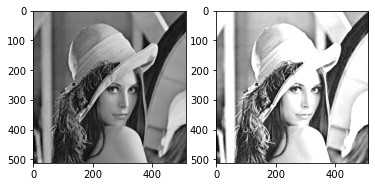

In [3]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.add(src, 100)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

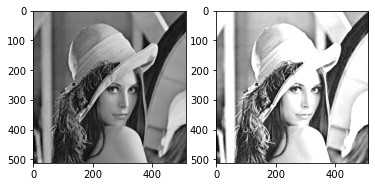

In [4]:
def saturated(value):
    if value > 255:
        value = 255
    elif value < 0:
        value = 0

    return value


dst = np.empty(src.shape, dtype=src.dtype)
for y in range(src.shape[0]):
    for x in range(src.shape[1]):
        #dst[y, x] = src[y, x] -50 #inversion happened
        dst[y, x] = saturated(src[y, x] +100 )
        #dst[y, x] = saturated(src[y, x] - 50 )  
        #dst[y, x] = src[y, x] +100
        
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)        

# 2. 효과적인 명암비  조절

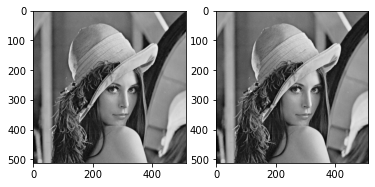

In [5]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

# dst(x,y) = src(x,y) + (src(x,y) - 128)*alpha  
alpha = -0.5  #-0.5,1.0,2.0,... chage alpha
dst = np.clip(src + (src - 128.)*alpha, 0, 255).astype(np.uint8) #clip prevent to go beyond range

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)  

# 3. 감마보정

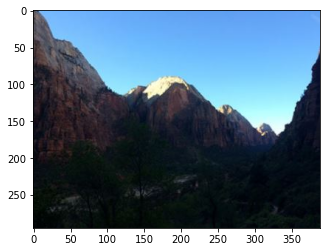

In [6]:
src = cv2.imread("gamma.jpg") 
imshow("", src)

In [7]:
gamma = 0.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
dst = cv2.LUT(src, lut) #To apply lut to original Image


gamma = 1.5
lut = np.zeros((256,1),dtype = 'uint8')
for i in range(256):  lut[i][0] = 255 * (float(i)/255) ** (gamma)
       
dst2 = cv2.LUT(src, lut)

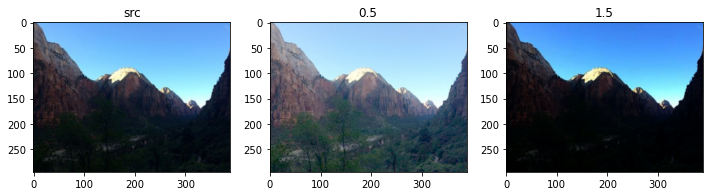

In [8]:
plt.figure(figsize=(12, 3)) #decide the size of image
plt.subplot(1,3,1)
imshow("src", src)    
plt.subplot(1,3,2)
imshow("0.5", dst)    
plt.subplot(1,3,3)
imshow("1.5", dst2)    

# 4. 히스토그램

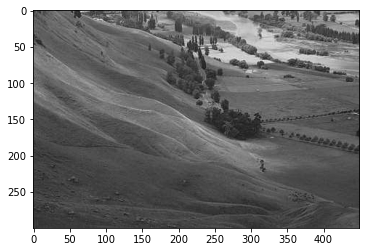

In [9]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
imshow("", src)

In [10]:
histSize = [256]
histRange = [0, 256]

hist = cv2.calcHist([src], [0], None, histSize, histRange) #input image as list #none(no mask)

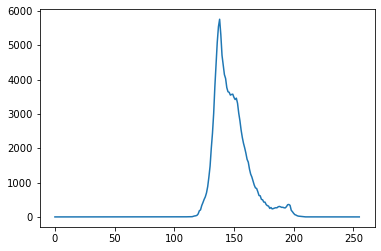

In [11]:
plt.plot(hist)

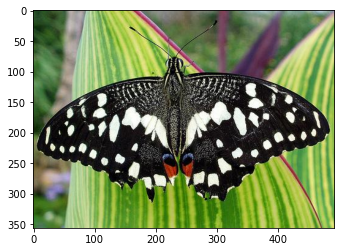

In [12]:
src = cv2.imread('butterfly.jpg')
imshow("", src)

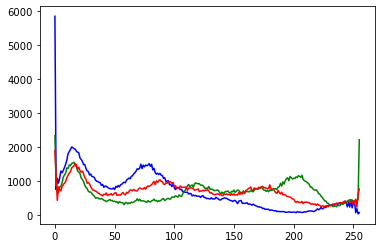

In [13]:
histB = cv2.calcHist([src], [0], None, histSize, histRange)
histG = cv2.calcHist([src], [1], None, histSize, histRange)
histR = cv2.calcHist([src], [2], None, histSize, histRange)

plt.plot(histB, 'b')
plt.plot(histG, 'g')
plt.plot(histR, 'r')

# 5. Histogram stretching

In [14]:
src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)

gmin = float(np.min(src))
gmax = float(np.max(src))

dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)

In [15]:
histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)

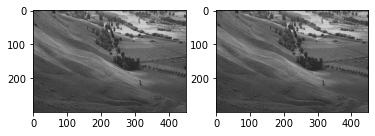

In [16]:
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

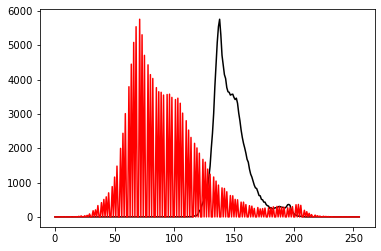

In [76]:
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

# 6. Histogram equalization

src = cv2.imread('hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)

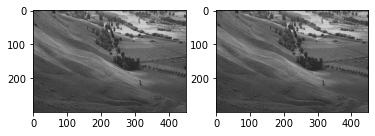

In [77]:
plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

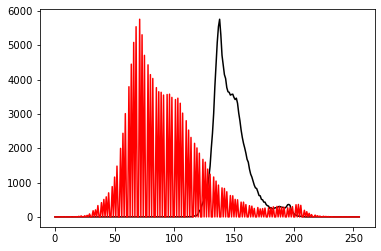

In [78]:
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

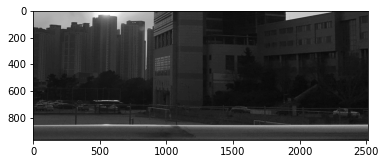

In [79]:
src = cv2.imread('kangnam.jpg', cv2.IMREAD_GRAYSCALE)
imshow("", src)

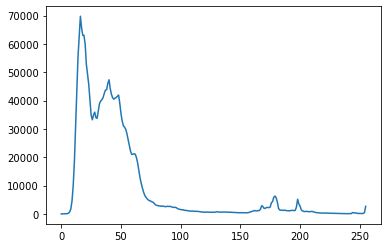

In [80]:
histSize = [256]
histRange = [0, 256]

hist = cv2.calcHist([src], [0], None, histSize, histRange)
plt.plot(hist)

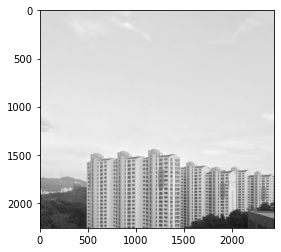

In [81]:
src = cv2.imread('apartment.jpg', cv2.IMREAD_GRAYSCALE)
imshow("", src)

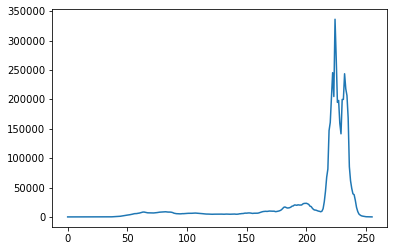

In [82]:
histSize = [256]
histRange = [0, 256]

hist = cv2.calcHist([src], [0], None, histSize, histRange)
plt.plot(hist)

## Histogram equalization

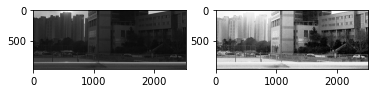

In [84]:
src = cv2.imread('kangnam.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

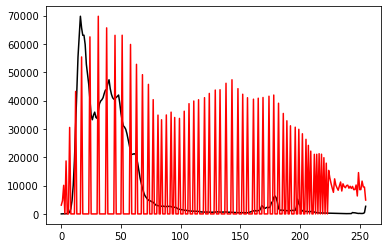

In [62]:
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')

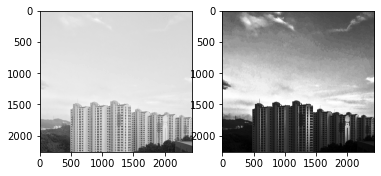

In [57]:
src = cv2.imread('apartment.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)

histSrc = cv2.calcHist([src], [0], None, histSize, histRange)
histDst = cv2.calcHist([dst], [0], None, histSize, histRange)

plt.subplot(1,2,1)
imshow("", src)
plt.subplot(1,2,2)
imshow("", dst)

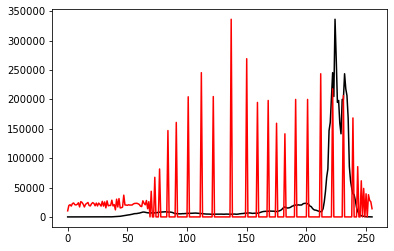

In [58]:
plt.plot(histSrc, 'k')
plt.plot(histDst, 'r')